##Importing libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime
import warnings
import re
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('Tesla Deaths.csv',parse_dates = ['Date'])
df.head()

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,Cyclists/ Peds,TSLA+cycl / peds,Model,AutoPilot claimed,Verified Tesla Autopilot Death,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,254,2022,2022-08-16,Germany,NaN,"Tesla car crashes into tree, burns",2,NaN,NaN,-,-,2,NaN,-,-,https://www.tag24.de/nachrichten/unfall/tesla-kracht-gegen-baum-und-brennt-aus-zwei-tote-und-drei-schwerverletzte-2584180,NaN,NaN,NaN,NaN,NaN
1,253,2022,2022-08-15,USA,CA,Tesla veers into oncoming traffic,4,1,3,-,-,4,NaN,-,-,https://www.ksbw.com/article/hollister-crash-kills-4-tesla-big-rig/40898893?utm_campaign=snd-autopilot,NaN,NaN,NaN,NaN,NaN
2,252,2022,2022-08-14,Finland,NaN,Unlicensed driver hits pedestrian,1,-,-,-,1,1,NaN,-,-,https://yle.fi/uutiset/3-12576787,NaN,NaN,NaN,NaN,NaN
3,251,2022,2022-08-02,USA,FL,Man in wheelchair hit crossing road,1,-,-,-,1,1,3,-,-,https://www.wfla.com/news/man-in-wheelchair-fatally-struck-by-suv-tesla-in-pasco-county/,NaN,NaN,NaN,NaN,NaN
4,250,2022,2022-07-27,USA,ME,Tesla crashes at high speed,1,1,-,-,-,1,-,-,-,https://www.boothbayregister.com/article/southport-accident-victim-named/163623,NaN,James T. Penner,NaN,NaN,NaN


In [69]:
df.shape

(254, 21)

In [70]:
df.isnull().sum()

Case #                                0
Year                                  0
Date                                  0
 Country                              0
 State                               69
 Description                          0
 Deaths                               0
 Tesla driver                         4
 Tesla occupant                       8
 Other vehicle                        3
 Cyclists/ Peds                       2
 TSLA+cycl / peds                     1
 Model                                3
 AutoPilot claimed                    4
 Verified Tesla Autopilot Death       0
 Source                               0
 Note                               246
 Deceased 1                         183
 Deceased 2                         239
 Deceased 3                         250
 Deceased 4                         254
dtype: int64

In [71]:
df.columns

Index(['Case #', 'Year', 'Date', ' Country ', ' State ', ' Description ',
       ' Deaths ', ' Tesla driver ', ' Tesla occupant ', ' Other vehicle ',
       ' Cyclists/ Peds ', ' TSLA+cycl / peds ', ' Model ',
       ' AutoPilot claimed ', ' Verified Tesla Autopilot Death ', ' Source ',
       ' Note ', ' Deceased 1 ', ' Deceased 2 ', ' Deceased 3 ',
       ' Deceased 4 '],
      dtype='object')

In [72]:
df.columns = df.columns.str.replace(' ','')
df.columns

Index(['Case#', 'Year', 'Date', 'Country', 'State', 'Description', 'Deaths',
       'Tesladriver', 'Teslaoccupant', 'Othervehicle', 'Cyclists/Peds',
       'TSLA+cycl/peds', 'Model', 'AutoPilotclaimed',
       'VerifiedTeslaAutopilotDeath', 'Source', 'Note', 'Deceased1',
       'Deceased2', 'Deceased3', 'Deceased4'],
      dtype='object')

In [74]:
df.corr()

,Case#,Year,Deaths
Case#,1.000000,0.934937,0.128079
Year,0.934937,1.000000,0.097627
Deaths,0.128079,0.097627,1.000000


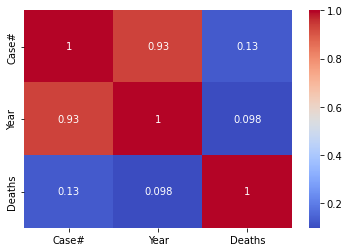

In [75]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

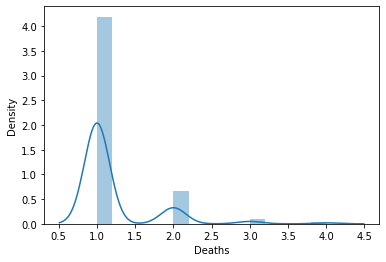

In [76]:
sns.distplot(df['Deaths'])

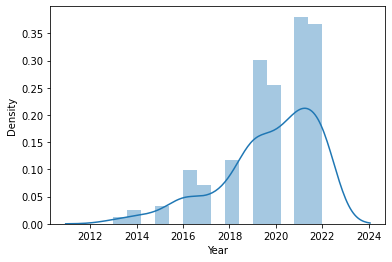

In [77]:
sns.distplot(df['Year'])

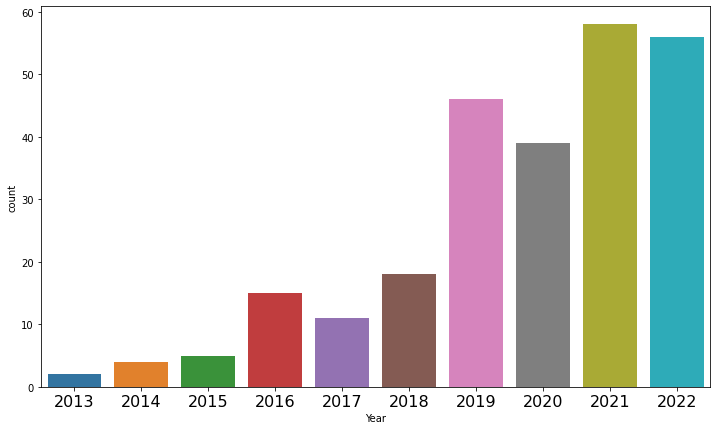

In [78]:
plt.figure(figsize=(12,7))
sns.countplot(df['Year'])
plt.xticks(fontsize=16)
plt.show()

In [79]:
import plotly.express as px
c_df = df.groupby(['Country'])['Deaths'].sum().reset_index()
c_fig = px.bar(c_df, x='Country', y='Deaths', title='Country wise deaths reported of Tesla Cars', text='Deaths')
c_fig.show()

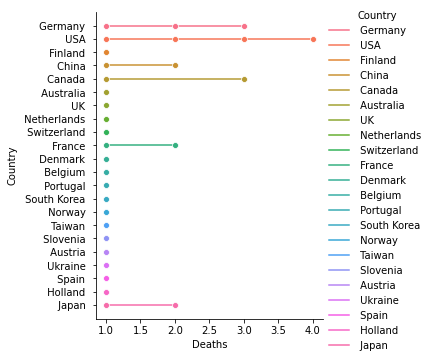

In [80]:
sns.relplot(x='Deaths', y='Country',kind = 'line', data=df, hue='Country', marker='o', ci = None)
plt.show()

In [81]:
df['State'] = df['State'].fillna(df['Country'])

In [82]:
df.isnull().sum()

Case#                          0
Year                           0
Date                           0
Country                        0
State                          0
Description                    0
Deaths                         0
Tesladriver                    4
Teslaoccupant                  8
Othervehicle                   3
Cyclists/Peds                  2
TSLA+cycl/peds                 1
Model                          3
AutoPilotclaimed               4
VerifiedTeslaAutopilotDeath    0
dtype: int64

In [83]:
deaths = df.groupby('Date').sum()['Deaths'].reset_index()

In [84]:
import plotly
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [95]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Date'], y=df['AutoPilotclaimed'], mode='lines+markers', name='deaths', line = dict(color = 'green')))
fig.update_layout(title_text='World wide AutoPilotclaimed of teslas', xaxis_tickfont_size = 14, yaxis=dict(title='Number of claimed'), plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [96]:
Tot_Cases = df.groupby('Model')['Deaths'].sum().sort_values(ascending = False).to_frame()
Tot_Cases.style.background_gradient(cmap='hot_r')

,Deaths
Model,
-,174
S,54
3,41
X,19
Y,9


In [97]:
dis = df.groupby('Description')['Deaths'].sum().sort_values(ascending = False).to_frame()
dis.style.background_gradient(cmap='hot_r')

,Deaths
Description,
Tesla kills pedestrian,10
Tesla rear ends stopped car,7
Tesla into oncoming traffic,6
Tesla drives off cliff,6
Tesla kills motorcyclist,6
"Tesla crashes into tree, occupants killed",4
Tesla veers into oncoming traffic,4
Tesla involved in multi-car highway accident,4
Tesla crashes into tree,4


In [85]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='deaths', line = dict(color = 'red')))
fig.update_layout(title_text='World wide Teslas deaths Cases', xaxis_tickfont_size = 14, yaxis=dict(title='Number of deaths'), plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [86]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536021 sha256=0fa014b4a337dc2249b43392ce8d98611b9fe9cdcec1e3ab408e621226fd320f
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.1.0
    Uninstalling cmdstanpy-1.1.0:
      Successfully uninstalled cmdsta

In [87]:
from fbprophet import Prophet
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [88]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future=m.make_future_dataframe(periods=30)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
255,2022-09-11
256,2022-09-12
257,2022-09-13
258,2022-09-14
259,2022-09-15


In [89]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
255,2022-09-11,1.523046,0.328239,2.737570
256,2022-09-12,1.686385,0.532333,2.869298
257,2022-09-13,1.413301,0.283523,2.662174
258,2022-09-14,1.623924,0.390237,2.854120
259,2022-09-15,1.262535,0.067276,2.536639


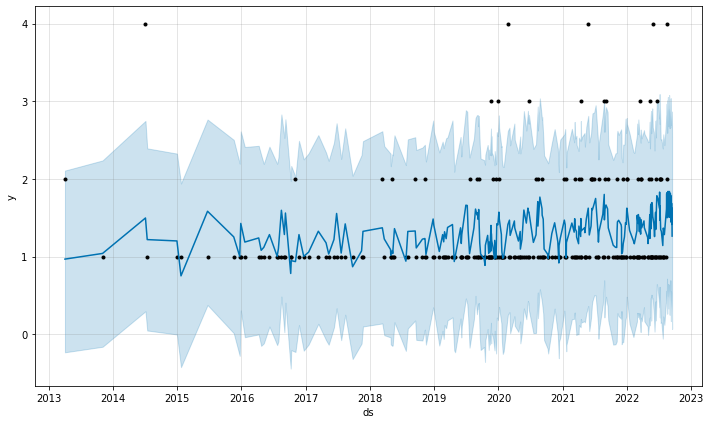

In [90]:
forecast_plot = m.plot(forecast)

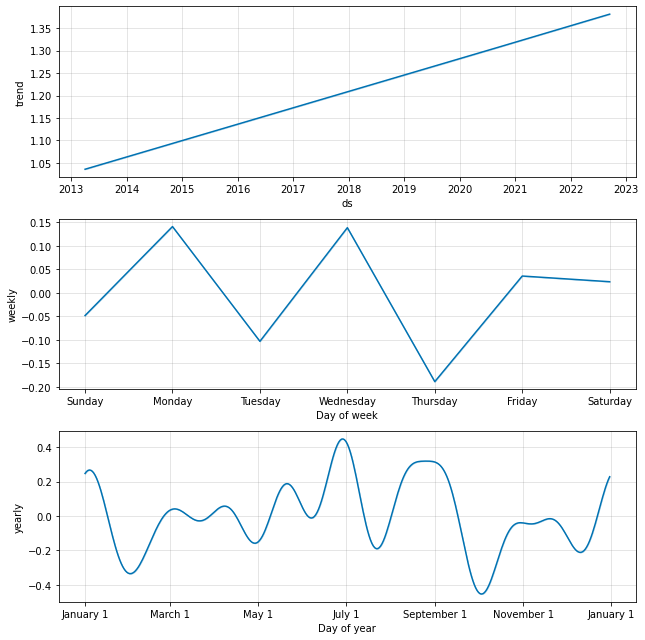

In [91]:
forecast_plot = m.plot_components(forecast)